Library

In [10]:
import pandas as pd
import numpy as np

import random
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras import layers, Sequential

In [11]:
import nltk
from nltk.tokenize import word_tokenize

In [12]:
train_data = pd.read_csv('train_data.csv')
train_data

,id,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,...,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
0,1,5,0.0,0.0,0.0,0,0.0,0.0,1,0,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
1,2,117,1.0,4.0,3.0,NaN,5.0,2.0,9,19,...,3.0,13,9.0,15,3.0,NaN,13,3,1,0
2,3,30,1.0,1.0,5.0,8,3.0,2.0,2,2,...,1.0,5,1.0,1,1.0,0.0,0,0,0,0
3,4,3,0.0,0.0,0.0,0,0.0,0.0,0,1,...,0.0,NaN,0.0,0,0.0,0.0,NaN,0,0,0
4,5,263,6.0,8.0,8.0,NaN,26.0,1.0,21,35,...,10.0,NaN,5.0,49,26.0,24.0,23,4,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,3616,131,2.0,1.0,9.0,27,4.0,0.0,6,13,...,10.0,2,0.0,10,2.0,3.0,4,1,3,1
3616,3617,7,0.0,0.0,1.0,0,0.0,0.0,2,2,...,0.0,0,1.0,1,0.0,1.0,1,1,0,0
3617,3618,3,0.0,0.0,NaN,0,0.0,0.0,0,1,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
3618,3619,47,3.0,0.0,0.0,12,1.0,3.0,3,5,...,2.0,11,2.0,9,2.0,3.0,3,4,1,0


Data Preprocessing

In [13]:
train_data.isnull().sum()

id          0
word-1     11
word-2     16
word-3     14
word-4     23
word-5     24
word-6     23
word-7     20
word-8     21
word-9     34
word-10    20
word-11    18
word-12    20
word-13    23
word-14    13
word-15    24
word-16    11
word-17    20
word-18    20
word-19    34
word-20    14
word-21    11
word-22    10
word-23    15
word-24     9
word-25    17
word-26    13
word-27    10
word-28    11
word-29    16
word-30    17
word-31    11
word-32    10
word-33    18
word-34    11
word-35    19
word-36    13
word-37    14
word-38    12
word-39     6
word-40     2
Result      0
dtype: int64

In [24]:
for column in train_data.columns[1:41]:
    train_data = train_data[pd.to_numeric(train_data[column], errors='coerce').notnull()]

In [25]:
train_data.isnull().sum()

id         0
word-1     0
word-2     0
word-3     0
word-4     0
word-5     0
word-6     0
word-7     0
word-8     0
word-9     0
word-10    0
word-11    0
word-12    0
word-13    0
word-14    0
word-15    0
word-16    0
word-17    0
word-18    0
word-19    0
word-20    0
word-21    0
word-22    0
word-23    0
word-24    0
word-25    0
word-26    0
word-27    0
word-28    0
word-29    0
word-30    0
word-31    0
word-32    0
word-33    0
word-34    0
word-35    0
word-36    0
word-37    0
word-38    0
word-39    0
word-40    0
Result     0
dtype: int64

In [26]:
train_data.describe()

,id,word-2,word-3,word-4,word-6,word-7,word-12,word-15,word-16,word-20,...,word-23,word-25,word-26,word-29,word-31,word-32,word-34,word-36,word-37,Result
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,...,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,1816.267961,1.582524,1.211974,1.764725,2.782848,1.319094,1.184790,8.469903,1.338188,1.342395,...,4.897411,4.938511,0.932039,10.018770,1.182848,1.632039,1.269579,43.614239,2.987702,0.287055
std,1043.824526,3.437433,2.717887,3.800971,5.483643,2.403823,2.558445,13.526513,2.522517,3.937425,...,8.179804,7.584942,2.626023,16.787755,3.015429,3.207239,2.513315,2337.628939,5.642630,0.452461
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,911.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1822.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2718.750000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,10.000000,2.000000,1.000000,...,6.000000,6.000000,1.000000,11.000000,1.000000,2.000000,1.750000,2.000000,3.000000,1.000000
max,3619.000000,81.000000,66.000000,117.000000,83.000000,31.000000,56.000000,275.000000,39.000000,123.000000,...,111.000000,108.000000,38.000000,302.000000,57.000000,66.000000,32.000000,129945.000000,108.000000,1.000000


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3618
Data columns (total 42 columns):
id         3090 non-null int64
word-1     3090 non-null object
word-2     3090 non-null float64
word-3     3090 non-null float64
word-4     3090 non-null float64
word-5     3090 non-null object
word-6     3090 non-null float64
word-7     3090 non-null float64
word-8     3090 non-null object
word-9     3090 non-null object
word-10    3090 non-null object
word-11    3090 non-null object
word-12    3090 non-null float64
word-13    3090 non-null object
word-14    3090 non-null object
word-15    3090 non-null float64
word-16    3090 non-null float64
word-17    3090 non-null object
word-18    3090 non-null object
word-19    3090 non-null object
word-20    3090 non-null float64
word-21    3090 non-null float64
word-22    3090 non-null object
word-23    3090 non-null float64
word-24    3090 non-null object
word-25    3090 non-null float64
word-26    3090 non-null float64
word-27    3090 n

In [ ]:
#train_data = train_data.dropna()

In [28]:
train_features = train_data.iloc[:,1:41]
train_label = train_data.iloc[:,41:]

In [29]:
train_label

,Result
0,0
2,0
5,0
6,0
9,1
...,...
3609,0
3610,0
3612,0
3614,1


In [39]:
train_features = np.asarray(train_features).astype(np.float64)
train_label = np.asarray(train_label).astype(np.float64)

In [40]:
train_features

array([[ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [30.,  1.,  1., ...,  0.,  0.,  0.],
       [16.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  0., ...,  0.,  0.,  0.],
       [32.,  2.,  0., ...,  2.,  3.,  8.],
       [47.,  3.,  0., ...,  3.,  4.,  1.]])

In [41]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(train_features, train_label, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(2472, 40) (309, 40) (309, 40) (2472, 1) (309, 1) (309, 1)


In [56]:
# random.seed(50)
# rf = RandomForestRegressor(n_estimators=10)
# rf.fit(X_train, y_train)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [57]:
callbacks = myCallback()

DEFINE MODEL

In [58]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(40,), kernel_initializer='random_normal', name='hidden1'),
    #Dropout(0,2),
    Dense(32, activation='relu', name='hidden2'),
    Dense(1, activation='sigmoid', name='output')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 32)                1312      
_________________________________________________________________
hidden2 (Dense)              (None, 32)                1056      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [59]:
X_train

array([[ 10.,   1.,   0., ...,   0.,   0.,   1.],
       [ 39.,   0.,   1., ...,   0.,   0.,   4.],
       [  6.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  6.,   0.,   0., ...,   0.,   0.,   0.],
       [134.,   1.,   4., ...,   5.,   3.,   1.],
       [  0.,   0.,   0., ...,   1.,   0.,   0.]])

In [65]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val,y_val), callbacks=[callbacks])

Train on 2472 samples, validate on 309 samples
Epoch 1/20
2472/2472 [==============================] - 0s 83us/sample - loss: 0.2357 - acc: 0.9045 - val_loss: 0.3833 - val_acc: 0.8479
Epoch 2/20
2472/2472 [==============================] - 0s 80us/sample - loss: 0.2252 - acc: 0.9066 - val_loss: 0.4126 - val_acc: 0.8835
Epoch 3/20
2472/2472 [==============================] - 0s 88us/sample - loss: 0.2308 - acc: 0.9005 - val_loss: 0.3875 - val_acc: 0.8706
Epoch 4/20
2472/2472 [==============================] - 0s 87us/sample - loss: 0.2152 - acc: 0.9110 - val_loss: 0.3716 - val_acc: 0.8900
Epoch 5/20
2472/2472 [==============================] - 0s 84us/sample - loss: 0.2042 - acc: 0.9167 - val_loss: 0.3584 - val_acc: 0.8673
Epoch 6/20
2472/2472 [==============================] - 0s 140us/sample - loss: 0.2099 - acc: 0.9187 - val_loss: 0.3953 - val_acc: 0.8932
Epoch 7/20
2472/2472 [==============================] - 0s 150us/sample - loss: 0.2112 - acc: 0.9175 - val_loss: 0.4296 - val_acc:

In [64]:
model.evaluate(X_test, y_test)

309/309 [==============================] - 0s 100us/sample - loss: 0.2170 - acc: 0.9159


[0.21704250323348062, 0.9158576]

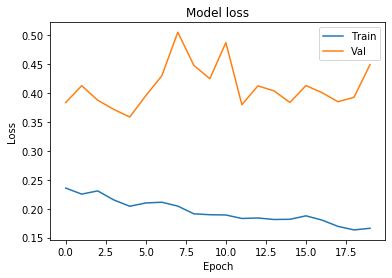

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

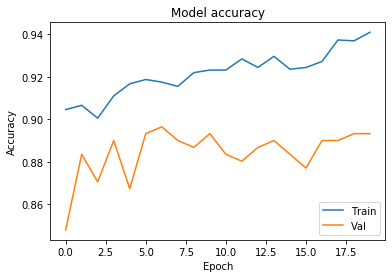

In [68]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Test data